In [57]:
import pickle
import datetime
from numpy import array
import matplotlib.pylab as plt
import pandas as pd
import covsirphy as cs
import numpy as np
from itertools import cycle
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
oxcgrt_data = data_loader.oxcgrt()

In [3]:
country = "United Kingdom"
s = cs.Scenario(jhu_data, population_data, country=country)

In [4]:
days, df_periods = s.estimate_delay(oxcgrt_data)
print(days)

16


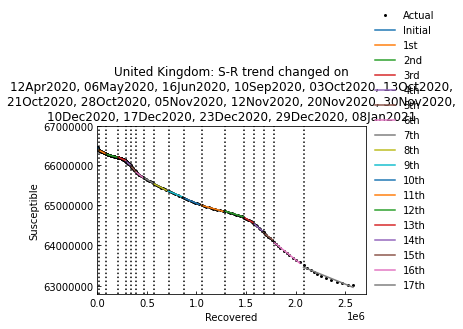


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (21Oct2020 - 27Oct2020): finished  491 trials in 0 min 30 sec
	 7th phase (20Nov2020 - 29Nov2020): finished   99 trials in 0 min 10 sec
	 1st phase (05Nov2020 - 11Nov2020): finished  200 trials in 0 min 20 sec
	 9th phase (28Oct2020 - 04Nov2020): finished  176 trials in 0 min 20 sec
	17th phase (16Jun2020 - 09Sep2020): finished 1269 trials in 3 min  1 sec
	 5th phase (13Oct2020 - 20Oct2020): finished 1293 trials in 3 min  2 sec
	 3rd phase (16Feb2020 - 11Apr2020): finished 1257 trials in 3 min  2 sec
	 0th phase (23Dec2020 - 28Dec2020): finished  180 trials in 0 min 20 sec
	11th phase (12Apr2020 - 05May2020): finished 1268 trials in 3 min  1 sec
	15th phase (12Nov2020 - 19Nov2020): finished  355 trials in 0 min 40 sec
	 2nd phase (17Dec2020 - 22Dec2020): finished   91 trials in 0 min 10 sec
	 8th phase (03Oct2020 - 12Oct2020): finished  176 trials in 0 min 20 sec
	14th phase (29Dec2020 - 07Jan2021): fi

In [5]:
s.trend()
s.estimate(cs.SIRF)

In [6]:
tracker = s.track()
tracker.head()
tracker = tracker.set_index("Date")
tracker = tracker.groupby("Date").mean()
tracker = tracker.shift(days)

In [7]:
ox_df = oxcgrt_data.cleaned()
ox_df = ox_df[ox_df["Country"] == country]
ox_df = ox_df.groupby("Date").mean()
ox_df.head()

,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Date,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
merged = pd.merge(ox_df.reset_index(), tracker.reset_index(), on="Date", how="inner")
merged

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,...,Rt,theta,kappa,rho,sigma,1/beta [day],1/alpha2 [day],1/gamma [day],alpha1 [-],Susceptible
0,2020-02-16,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-17,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-18,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-19,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-20,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021-01-15,2.041667,2.166667,2.0,4.0,1.0,2.0,1.166667,3.0,2.00,...,2.09,0.00124,0.000976,0.090157,0.042032,11.0,1024.0,23.0,0.001,64027456.0
335,2021-01-16,2.041667,2.166667,2.0,4.0,1.0,2.0,1.166667,3.0,2.00,...,2.09,0.00124,0.000976,0.090157,0.042032,11.0,1024.0,23.0,0.001,63971564.0
336,2021-01-17,2.041667,2.166667,2.0,4.0,1.0,2.0,1.166667,3.0,2.00,...,2.09,0.00124,0.000976,0.090157,0.042032,11.0,1024.0,23.0,0.001,63918279.0
337,2021-01-18,2.041667,2.166667,2.0,4.0,1.0,2.0,1.166667,3.0,2.00,...,2.09,0.00124,0.000976,0.090157,0.042032,11.0,1024.0,23.0,0.001,63860555.0


In [9]:
measures = ox_df.columns
# measures = [measures[0]]
interests = ["theta", "kappa", "rho", "sigma", "1/gamma [day]", "alpha1 [-]",  "1/alpha2 [day]", "1/beta [day]", "Measure"]
params_total = pd.DataFrame(columns=interests)

for i in range(len(measures)):
    measure = measures[i]
    values = ox_df[measure].values
    high = np.max(values)
    dates = ox_df[ox_df[measure] == high].reset_index()["Date"]
    subset = tracker.reset_index()[tracker.reset_index()["Date"].isin(dates)]
    means_df = subset.mean()[interests[:-1]]
    means_df["Measure"] = measure
    params_total.loc[i] = means_df
params_total = params_total.set_index("Measure")
params_total



,theta,kappa,rho,sigma,1/gamma [day],alpha1 [-],1/alpha2 [day],1/beta [day]
Measure,,,,,,,,
School_closing,0.094673,0.000960,0.136423,0.033299,80.714286,0.094800,1195.000000,9.114286
Workplace_closing,0.070069,0.001118,0.166809,0.019385,110.137255,0.070255,994.490196,6.784314
Cancel_events,0.041217,0.000635,0.084689,0.052155,32.944079,0.041299,19250.927632,13.348684
Gatherings_restrictions,0.041353,0.000631,0.084019,0.052360,32.289037,0.041435,19431.342193,13.395349
Transport_closing,0.041149,0.000640,0.085424,0.051859,33.656863,0.041232,19130.163399,13.294118
Stay_home_restrictions,0.058987,0.001047,0.147955,0.024837,89.825397,0.059127,1060.460317,7.873016
Internal_movement_restrictions,0.073930,0.001101,0.163821,0.020605,107.000000,0.074120,1016.200000,6.960000
International_movement_restrictions,0.006864,0.000588,0.085580,0.049582,20.370370,0.006852,2517.518519,11.629630
Information_campaigns,0.040607,0.000674,0.091305,0.049498,39.359133,0.040693,18164.049536,12.857585


In [12]:
params_total = params_total.round(decimals=4)
params_total.to_csv("parameters_UK.csv")
params_total = params_total.reset_index()

In [23]:
# Create scenario
name = 'Gatherings_restrictions'
selection = params_total[params_total["Measure"] == name]
preset_dict = {
    "theta": selection["theta"].values[0],
    "kappa": selection["kappa"].values[0],
    "sigma": selection["sigma"].values[0],
    "rho": selection["rho"].values[0]
}
print(preset_dict)
s.summary()

{'theta': 0.0414, 'kappa': 0.0006, 'sigma': 0.0524, 'rho': 0.084}


Type      Start        End  Population  \
Scenario                Phase                                             
Main                    0th      Past  16Feb2020  11Apr2020    66460344   
                        1st      Past  12Apr2020  05May2020    66460344   
                        2nd      Past  06May2020  15Jun2020    66460344   
                        3rd      Past  16Jun2020  09Sep2020    66460344   
                        4th      Past  10Sep2020  02Oct2020    66460344   
                        5th      Past  03Oct2020  12Oct2020    66460344   
                        6th      Past  13Oct2020  20Oct2020    66460344   
                        7th      Past  21Oct2020  27Oct2020    66460344   
                        8th      Past  28Oct2020  04Nov2020    66460344   
                        9th      Past  05Nov2020  11Nov2020    66460344   
                        10th     Past  12Nov2020  19Nov2020    66460344   
                        11th     Past  20Nov2020  29Nov2020    66460344   
                        12th     Past  30Nov2020  09Dec2020    66460344   
                        13th     Past  10Dec2020  16Dec2020    66460344   
                        14th     Past  17Dec2020  22Dec2020    66460344   
                        15th     Past  23Dec2020  28Dec2020    66460344   
                        16th     Past  29Dec2020  07Jan2021    66460344   
                        17th     Past  08Jan2021  19Jan2021    66460344   
Gatherings_restrictions 0th      Past  16Feb2020  11Apr2020    66460344   
                        1st      Past  12Apr2020  05May2020    66460344   
                        2nd      Past  06May2020  15Jun2020    66460344   
                        3rd      Past  16Jun2020  09Sep2020    66460344   
                        4th      Past  10Sep2020  02Oct2020    66460344   
                        5th      Past  03Oct2020  12Oct2020    66460344   
                        6th      Past  13Oct2020  20Oct2020    66460344   
                        7th      Past  21Oct2020  27Oct2020    66460344   
                        8th      Past  28Oct2020  04Nov2020    66460344   
                        9th      Past  05Nov2020  11Nov2020    66460344   
                        10th     Past  12Nov2020  19Nov2020    66460344   
                        11th     Past  20Nov2020  29Nov2020    66460344   
                        12th     Past  30Nov2020  09Dec2020    66460344   
                        13th     Past  10Dec2020  16Dec2020    66460344   
                        14th     Past  17Dec2020  22Dec2020    66460344   
                        15th     Past  23Dec2020  28Dec2020    66460344   
                        16th     Past  29Dec2020  07Jan2021    66460344   
                        17th     Past  08Jan2021  19Jan2021    66460344   
                        18th   Future  20Jan2021  18Feb2021    66460344   

                                 ODE     Rt     theta     kappa       rho  \
Scenario                Phase                                               
Main                    0th    SIR-F  23.04  0.030856  0.001292  0.197155   
                        1st    SIR-F   1.13  0.184689  0.000610  0.078106   
                        2nd    SIR-F   0.69  0.108370  0.000608  0.057752   
                        3rd    SIR-F   0.93  0.020632  0.000574  0.060061   
                        4th    SIR-F   2.28  0.000268  0.000402  0.092065   
                        5th    SIR-F   3.15  0.000908  0.000002  0.104675   
                        6th    SIR-F   2.44  0.000012  0.000566  0.076302   
                        7th    SIR-F   1.48  0.000442  0.000783  0.075410   
                        8th    SIR-F   1.26  0.000349  0.000710  0.067446   
                        9th    SIR-F   1.01  0.004705  0.000751  0.063162   
                        10th   SIR-F   0.99  0.016705  0.000202  0.061640   
                        11th   SIR-F   0.68  0.019713  0.000450  0.046386   
                        12th 

In [45]:
all_infecteds = pd.DataFrame()
target = "Infected"
measures_new = ['School_closing', 'Workplace_closing', 'Cancel_events',
       'Gatherings_restrictions', 'Transport_closing',
       'Stay_home_restrictions', 'Internal_movement_restrictions',
       'International_movement_restrictions']

for measure in measures_new:
    name = measure
    selection = params_total[params_total["Measure"] == name]
    preset_dict = {
        "theta": selection["theta"].values[0],
        "kappa": selection["kappa"].values[0],
        "sigma": selection["sigma"].values[0],
        "rho": selection["rho"].values[0]
    }
    print(measure, preset_dict)
    s.summary()

    s.clear(name=name)
    s.add(name=name, 
          end_date='01Mar2021',
          **preset_dict,
          mode=cs.SIRF)
    records = s.simulate(name=name, show_figure=False)
    all_infecteds[measure] = records[target]
    
all_infecteds["Date"] = records["Date"]

School_closing {'theta': 0.0947, 'kappa': 0.001, 'sigma': 0.0333, 'rho': 0.1364}
Workplace_closing {'theta': 0.0701, 'kappa': 0.0011, 'sigma': 0.0194, 'rho': 0.1668}
Cancel_events {'theta': 0.0412, 'kappa': 0.0006, 'sigma': 0.0522, 'rho': 0.0847}
Gatherings_restrictions {'theta': 0.0414, 'kappa': 0.0006, 'sigma': 0.0524, 'rho': 0.084}
Transport_closing {'theta': 0.0411, 'kappa': 0.0006, 'sigma': 0.0519, 'rho': 0.0854}
Stay_home_restrictions {'theta': 0.059, 'kappa': 0.001, 'sigma': 0.0248, 'rho': 0.148}
Internal_movement_restrictions {'theta': 0.0739, 'kappa': 0.0011, 'sigma': 0.0206, 'rho': 0.1638}
International_movement_restrictions {'theta': 0.0069, 'kappa': 0.0006, 'sigma': 0.0496, 'rho': 0.0856}


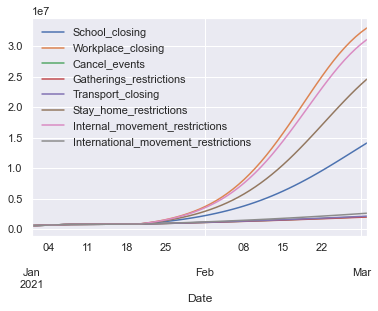

In [46]:
all_infecteds_subsection = all_infecteds.query("Date>='2021-01-01'")
all_infecteds_subsection.plot(x="Date", y=measures_new);

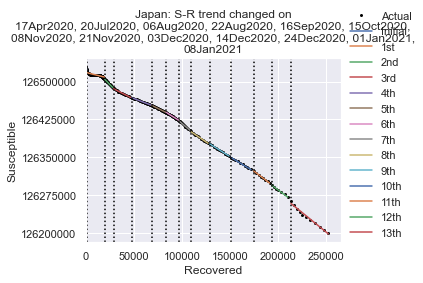


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (24Dec2020 - 31Dec2020): finished  817 trials in 0 min 50 sec
	 9th phase (22Aug2020 - 15Sep2020): finished  220 trials in 0 min 20 sec
	 5th phase (20Jul2020 - 05Aug2020): finished  618 trials in 1 min  0 sec
	11th phase (08Nov2020 - 20Nov2020): finished  347 trials in 0 min 30 sec
	 4th phase (21Nov2020 - 02Dec2020): finished  241 trials in 0 min 20 sec
	 0th phase (03Dec2020 - 13Dec2020): finished  128 trials in 0 min 10 sec
	 8th phase (16Sep2020 - 14Oct2020): finished  229 trials in 0 min 20 sec
	 2nd phase (01Jan2021 - 07Jan2021): finished  248 trials in 0 min 20 sec
	 1st phase (17Apr2020 - 19Jul2020): finished 1576 trials in 3 min  1 sec
	 7th phase (15Oct2020 - 07Nov2020): finished 1622 trials in 3 min  1 sec
	 3rd phase (06Aug2020 - 21Aug2020): finished 1643 trials in 3 min  1 sec
	13th phase (14Dec2020 - 23Dec2020): finished  398 trials in 0 min 30 sec
	10th phase (08Jan2021 - 18Jan2021): fi

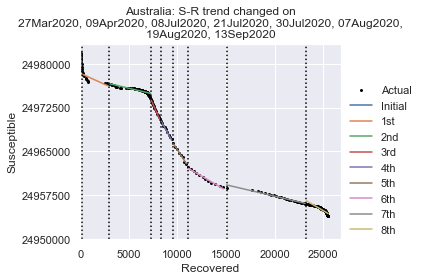


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (08Jul2020 - 20Jul2020): finished 2327 trials in 3 min  0 sec
	 3rd phase (19Aug2020 - 12Sep2020): finished  637 trials in 1 min 10 sec
	 1st phase (13Sep2020 - 19Jan2021): finished 1441 trials in 3 min  1 sec
	 7th phase (30Jul2020 - 06Aug2020): finished 1493 trials in 3 min  1 sec
	 5th phase (19Mar2020 - 26Mar2020): finished 1497 trials in 3 min  1 sec
	 4th phase (27Mar2020 - 08Apr2020): finished 1534 trials in 3 min  1 sec
	 0th phase (09Apr2020 - 07Jul2020): finished 1704 trials in 3 min  1 sec
	 8th phase (21Jul2020 - 29Jul2020): finished 1752 trials in 3 min  1 sec
	 2nd phase (07Aug2020 - 18Aug2020): finished 1756 trials in 3 min  1 sec
Completed optimization. Total: 9 min  6 sec
School_closing {'theta': 0.04902369600294062, 'kappa': 0.0004019660406985997, 'sigma': 0.021118398295204562, 'rho': 0.018092871859435943}
Workplace_closing {'theta': 0.07332021105153384, 'kappa': 0.0003329400862780937

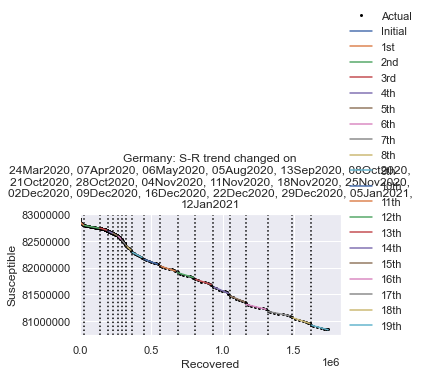


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	13th phase (12Jan2021 - 19Jan2021): finished 2367 trials in 3 min  0 sec
	 1st phase (16Dec2020 - 21Dec2020): finished  199 trials in 0 min 20 sec
	10th phase (28Oct2020 - 03Nov2020): finished  711 trials in 1 min 20 sec
	 3rd phase (21Oct2020 - 27Oct2020): finished  308 trials in 0 min 30 sec
	 2nd phase (25Nov2020 - 01Dec2020): finished  215 trials in 0 min 20 sec
	19th phase (05Aug2020 - 12Sep2020): finished 1449 trials in 3 min  1 sec
	16th phase (08Oct2020 - 20Oct2020): finished 1459 trials in 3 min  2 sec
	 7th phase (06May2020 - 04Aug2020): finished 1443 trials in 3 min  1 sec
	 6th phase (22Dec2020 - 28Dec2020): finished 1551 trials in 3 min  1 sec
	 8th phase (29Dec2020 - 04Jan2021): finished 1562 trials in 3 min  1 sec
	17th phase (05Jan2021 - 11Jan2021): finished 1560 trials in 3 min  1 sec
	 4th phase (02Dec2020 - 08Dec2020): finished  194 trials in 0 min 20 sec
	18th phase (07Apr2020 - 05May2020): fi

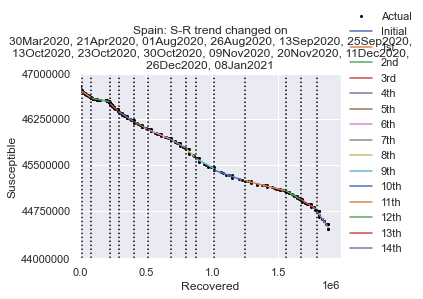


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (26Dec2020 - 07Jan2021): finished 2292 trials in 3 min  1 sec
	 1st phase (09Nov2020 - 19Nov2020): finished  296 trials in 0 min 30 sec
	14th phase (30Mar2020 - 20Apr2020): finished 1458 trials in 3 min  1 sec
	 7th phase (30Oct2020 - 08Nov2020): finished 1460 trials in 3 min  1 sec
	 9th phase (13Sep2020 - 24Sep2020): finished 1468 trials in 3 min  1 sec
	 4th phase (21Apr2020 - 31Jul2020): finished  201 trials in 0 min 20 sec
	 3rd phase (23Oct2020 - 29Oct2020): finished 1487 trials in 3 min  1 sec
	11th phase (20Nov2020 - 10Dec2020): finished  417 trials in 0 min 40 sec
	 8th phase (26Aug2020 - 12Sep2020): finished 1006 trials in 1 min 51 sec
	10th phase (08Jan2021 - 19Jan2021): finished  329 trials in 0 min 30 sec
	 5th phase (15Feb2020 - 29Mar2020): finished 1519 trials in 3 min  1 sec
	 0th phase (01Aug2020 - 25Aug2020): finished 1488 trials in 3 min  1 sec
	 2nd phase (25Sep2020 - 12Oct2020): fi

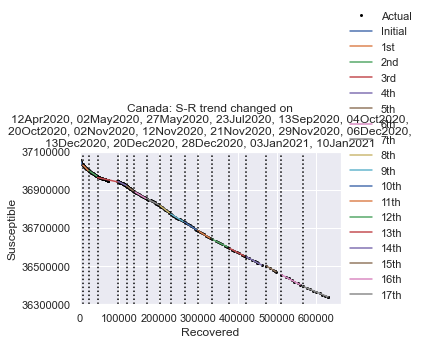


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 6th phase (06Dec2020 - 12Dec2020): finished  424 trials in 0 min 20 sec
	 1st phase (13Sep2020 - 03Oct2020): finished  255 trials in 0 min 20 sec
	 5th phase (02Nov2020 - 11Nov2020): finished  373 trials in 0 min 30 sec
	17th phase (12Feb2020 - 11Apr2020): finished 1628 trials in 3 min  1 sec
	 7th phase (27May2020 - 22Jul2020): finished 1621 trials in 3 min  1 sec
	 9th phase (12Nov2020 - 20Nov2020): finished 1643 trials in 3 min  1 sec
	15th phase (23Jul2020 - 12Sep2020): finished 1606 trials in 3 min  1 sec
	 0th phase (20Dec2020 - 27Dec2020): finished  228 trials in 0 min 20 sec
	 8th phase (10Jan2021 - 19Jan2021): finished  226 trials in 0 min 20 sec
	11th phase (04Oct2020 - 19Oct2020): finished  519 trials in 0 min 50 sec
	 2nd phase (29Nov2020 - 05Dec2020): finished  120 trials in 0 min 10 sec
	10th phase (21Nov2020 - 28Nov2020): finished  616 trials in 1 min  0 sec
	14th phase (02May2020 - 26May2020): fi

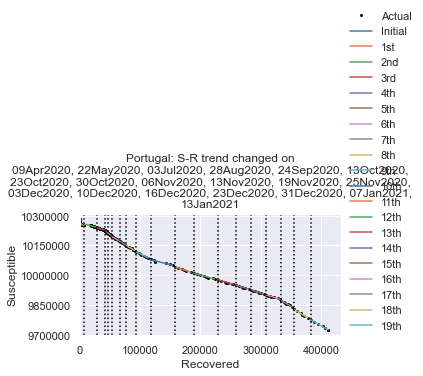


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	13th phase (03Jul2020 - 27Aug2020): finished 1834 trials in 3 min  6 sec
	19th phase (03Dec2020 - 09Dec2020): finished  111 trials in 0 min 10 sec
	 8th phase (13Oct2020 - 22Oct2020): finished  202 trials in 0 min 20 sec
	 1st phase (07Jan2021 - 12Jan2021): finished  980 trials in 1 min 50 sec
	10th phase (10Dec2020 - 15Dec2020): finished 1480 trials in 3 min  1 sec
	 7th phase (23Oct2020 - 29Oct2020): finished  692 trials in 1 min 10 sec
	16th phase (24Sep2020 - 12Oct2020): finished 1474 trials in 3 min  1 sec
	18th phase (06Nov2020 - 12Nov2020): finished  327 trials in 0 min 30 sec
	 2nd phase (25Nov2020 - 02Dec2020): finished 1497 trials in 3 min  1 sec
	 3rd phase (31Dec2020 - 06Jan2021): finished 1549 trials in 3 min  1 sec
	17th phase (28Aug2020 - 23Sep2020): finished 1545 trials in 3 min  1 sec
	15th phase (19Nov2020 - 24Nov2020): finished  219 trials in 0 min 20 sec
	14th phase (23Dec2020 - 30Dec2020): fi

In [49]:
countries = ["Japan", "Australia", "Germany", "Spain", "Canada", "Portugal", "Japan", "Netherlands"]
for country in countries:
    s = cs.Scenario(jhu_data, population_data, country=country)
    days, df_periods = s.estimate_delay(oxcgrt_data)

    s.trend()
    s.estimate(cs.SIRF)
    tracker = s.track()
    tracker = tracker.set_index("Date")
    tracker = tracker.groupby("Date").mean()
    tracker = tracker.shift(days)
    ox_df = oxcgrt_data.cleaned()
    ox_df = ox_df[ox_df["Country"] == country]
    ox_df = ox_df.groupby("Date").mean()
    merged = pd.merge(ox_df.reset_index(), tracker.reset_index(), on="Date", how="inner")

    measures = ox_df.columns
    interests = ["theta", "kappa", "rho", "sigma", "1/gamma [day]", "alpha1 [-]",  "1/alpha2 [day]", "1/beta [day]", "Measure"]
    params_total = pd.DataFrame(columns=interests)

    for i in range(len(measures)):
        measure = measures[i]
        values = ox_df[measure].values
        high = np.max(values)
        dates = ox_df[ox_df[measure] == high].reset_index()["Date"]
        subset = tracker.reset_index()[tracker.reset_index()["Date"].isin(dates)]
        means_df = subset.mean()[interests[:-1]]
        means_df["Measure"] = measure
        params_total.loc[i] = means_df
    params_total = params_total.set_index("Measure")
    params_total = params_total.reset_index()

    all_infecteds = pd.DataFrame()
    target = "Infected"
    measures_new = ['School_closing', 'Workplace_closing', 'Cancel_events',
           'Gatherings_restrictions', 'Transport_closing',
           'Stay_home_restrictions', 'Internal_movement_restrictions',
           'International_movement_restrictions']

    for measure in measures_new:
        name = measure
        selection = params_total[params_total["Measure"] == name]
        preset_dict = {
            "theta": selection["theta"].values[0],
            "kappa": selection["kappa"].values[0],
            "sigma": selection["sigma"].values[0],
            "rho": selection["rho"].values[0]
        }
        print(measure, preset_dict)
        s.summary()

        s.clear(name=name)
        s.add(name=name, 
              end_date='01Mar2021',
              **preset_dict,
              mode=cs.SIRF)
        records = s.simulate(name=name, show_figure=False)
        all_infecteds[measure] = records[target]

    all_infecteds["Date"] = records["Date"]
    all_infecteds.to_pickle("figures/pickles/" + country + "measures")
    all_infecteds_subsection = all_infecteds.query("Date>='2021-01-01'")

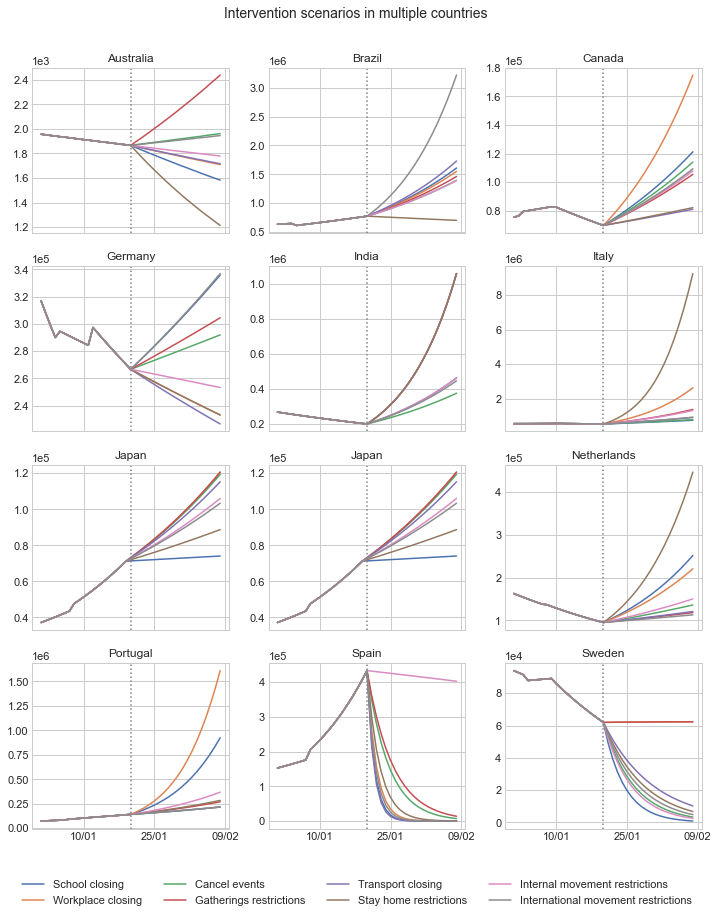

In [210]:
import matplotlib.dates as mdates

plt.style.use('seaborn-whitegrid')


countries = ["Japan", "Australia", "Germany", "Spain", "Canada", "Portugal", 
             "Japan", "Netherlands", "Italy", "India", "Sweden", "Brazil"]
countries = np.sort(countries)

fig, axes = plt.subplots(nrows=4, ncols=3, sharex=True, figsize=(12, 14), constrained_layout=False)
axes = axes.flatten()
fig.suptitle("Intervention scenarios in multiple countries", fontsize=14,  y=0.94)

for i in range(len(countries)):
    ms_df = pickle.load(open("figures/pickles/" + countries[i] + "measures", "rb"))
    ms_df = ms_df.query("Date>='2021-01-01'")
    ms_df = ms_df.query("Date<='2021-02-08'")
    axes[i].plot(ms_df["Date"], ms_df[measures_new])
    axes[i].axvline(x=datetime.datetime(2021, 1, 20), color="grey", linestyle=":")
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    axes[i].xaxis.set_major_locator(plt.MaxNLocator(4))
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[i].title.set_text(countries[i])
# handles, labels = axes.get_legend_handles_labels()
# fig.legend(handles, labels, loc='best');
axes[i].legend(measures_new_str, bbox_to_anchor=(1, -0.25), ncol=4, loc="bottom")
plt.format_xdata = mdates.DateFormatter('%Y-%m')
plt.savefig("figures/measures_all_countries")
plt.show()

In [177]:
measures_new_str = []
for i in measures_new:
    measures_new_str.append(i.replace("_", " "))
    